<a href="https://colab.research.google.com/github/gledison-bomfim/analise_dio/blob/main/Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalhando com Pandas


### **Import**

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt



### Trabalhando com arquivo excel


In [ ]:
df1 =  pd.read_excel("Aracaju.xlsx")
df2 =  pd.read_excel("Fortaleza.xlsx")
df3 =  pd.read_excel("Natal.xlsx")
df4 =  pd.read_excel("Recife.xlsx")
df5 =  pd.read_excel("Salvador.xlsx")

In [ ]:
df =  pd.concat([df1,df2, df3, df4, df5 ])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].mean()

122.61180089485438

In [ ]:
df["Vendas"].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
df.dropna(how="all", inplace=True)

In [ ]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita"].max()

3544.0

In [ ]:
df["Receita/vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Menor receita
df["Receita"].min()

3.34

In [ ]:
#Maior receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
df.sort_values("Receita", ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


### Análise das datas

In [ ]:
df["Data"] = df["Data"].astype("int64")

In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/vendas    float64
dtype: object

In [ ]:
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/vendas           float64
dtype: object

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
df["AnoVenda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,AnoVenda
52,Recife,2019-01-01,11.87,981,6,71.22,6.0,2019
179,Salvador,2019-01-02,64.95,1036,1,64.95,1.0,2019
106,Fortaleza,2019-01-01,28.42,1002,3,85.26,3.0,2019
163,Natal,2019-01-02,17.66,1036,3,52.98,3.0,2019
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019


In [ ]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
df["MesVenda"], df["DiaVenda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,AnoVenda,MesVenda,DiaVenda
34,Recife,2019-01-01,24.97,980,5,124.85,5.0,2019,1,1


In [ ]:
df["Diferença_dias"] = df["Data"] -  df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,AnoVenda,MesVenda,DiaVenda,Diferença_dias
218,Natal,2019-01-02,189.12,1036,3,567.36,3.0,2019,1,2,366 days
44,Recife,2019-01-01,142.21,983,8,1137.68,8.0,2019,1,1,365 days
63,Salvador,2019-01-01,166.59,1036,1,166.59,1.0,2019,1,1,365 days
208,Salvador,2019-01-02,39.40,1036,3,118.20,3.0,2019,1,2,366 days
59,Recife,2019-01-01,89.39,983,5,446.95,5.0,2019,1,1,365 days


In [ ]:
df["Trimestre"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,AnoVenda,MesVenda,DiaVenda,Diferença_dias,Trimestre
81,Aracaju,2018-01-01,53.41,1520,2,106.82,2.0,2018,1,1,0 days,1
61,Recife,2019-01-01,127.85,982,7,894.95,7.0,2019,1,1,365 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,1.0,2019,3,2,425 days,1
103,Fortaleza,2019-01-01,142.57,1002,3,427.71,3.0,2019,1,1,365 days,1
5,Fortaleza,2019-01-01,37.30,1002,5,186.50,5.0,2019,1,1,365 days,1


In [ ]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,AnoVenda,MesVenda,DiaVenda,Diferença_dias,Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


### Visualização dos dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

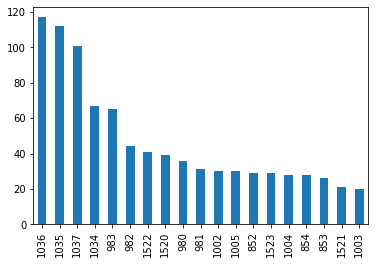

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

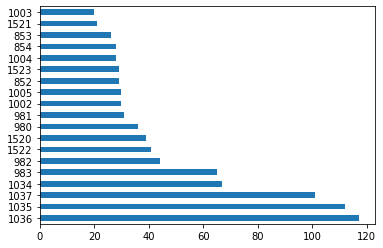

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh();

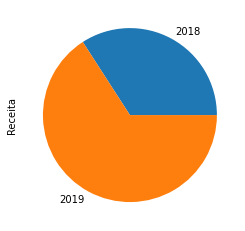

In [ ]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Números de vendas')

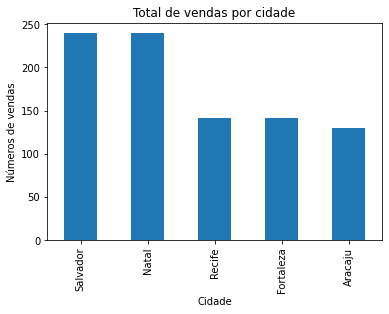

In [ ]:
#Adicionando um título e alterando o nome dos eixos
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade");
plt.xlabel("Cidade")
plt.ylabel("Números de vendas")

Text(0, 0.5, 'Números de vendas')

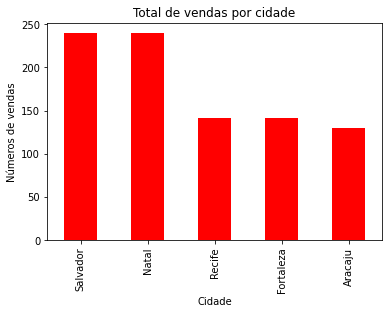

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade", color="red");
plt.xlabel("Cidade")
plt.ylabel("Números de vendas")

In [ ]:
#alterando o estilo
plt.style.use("ggplot")

Text(0, 0.5, 'Quantidade de vendas')

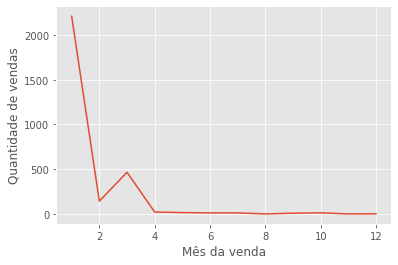

In [ ]:
df.groupby(df["MesVenda"])["Qtde"].sum().plot();
plt.xlabel("Mês da venda")
plt.ylabel("Quantidade de vendas")

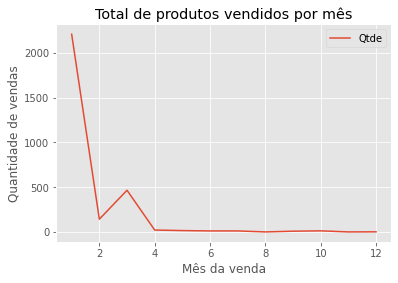

In [ ]:
df.groupby(df["MesVenda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês da venda")
plt.ylabel("Quantidade de vendas")
plt.legend();

In [ ]:
df.groupby(df["MesVenda"])["Qtde"].sum()

MesVenda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecinando apenas as vendas de 2019
df_2019 = df[df["AnoVenda"] == 2019]

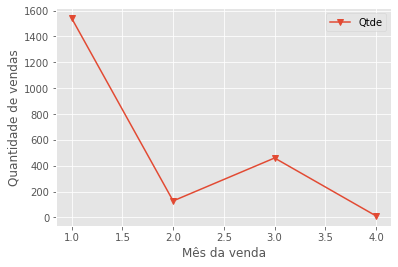

In [ ]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["MesVenda"])["Qtde"].sum().plot(marker="v")
plt
plt.xlabel("Mês da venda")
plt.ylabel("Quantidade de vendas")
plt.legend();

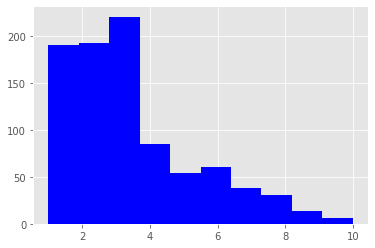

In [ ]:
#Histograma
plt.hist(df["Qtde"], color="blue");

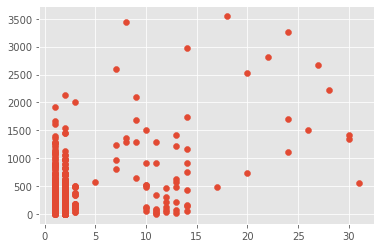

In [ ]:
plt.scatter(x=df_2019["DiaVenda"], y = df_2019["Receita"]);

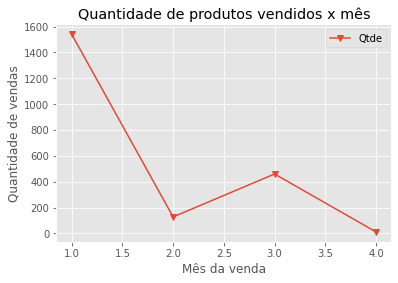

In [ ]:
#Salvando em PNG
df_2019.groupby(df_2019["MesVenda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês da venda")
plt.ylabel("Quantidade de vendas")
plt.legend();
plt.savefig("grafico_Vendas_x_mes.png")

### Análise Exploratória

In [ ]:
plt.style.use("seaborn")

In [ ]:
#upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [ ]:
#Criando o DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
#descobrir a quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
#verificando o tipo de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
#Qual é a receita total?
df["Valor Venda"].sum()

5984606.1426

In [ ]:
#Qual o custo total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna custo

In [164]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [166]:
#Qual o custo total?
round(df["custo"].sum(), 2)

2486783.05

In [167]:
#Criando a coluna de lucro que será a Receita - custo
df["lucro"] = df["Valor Venda"] - df["custo"]

In [170]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [171]:
#Total do lucro
round(df["lucro"].sum(), 2)

3497823.09

In [172]:
#Criando coluna com o total de dias para enviar o produto
df["tempo_envio"] =  df["Data Envio"] - df["Data Venda"]

In [173]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [176]:
### Precisamos saber o tempo médio de envio de cada marca, para isso vamos precisar tranformar acoluna tempo_envio para number

In [178]:
#Extraindo apenas os dias
df["tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [180]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [181]:
df["tempo_envio"].dtype

dtype('int64')

In [182]:
df.groupby("Marca")["tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

In [184]:
#Verificando se há dados faltantes
df.isnull().sum()


Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

In [187]:
#Lucro do ano por marca
#Vamos agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year,"Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [186]:
pd.options.display.float_format = "{:20,.2f}".format

In [190]:
#resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [196]:
#Qual o total de produtos vendidos? 
produtos_vendidos = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).reset_index()
produtos_vendidos


,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


Text(0, 0.5, 'Produto')

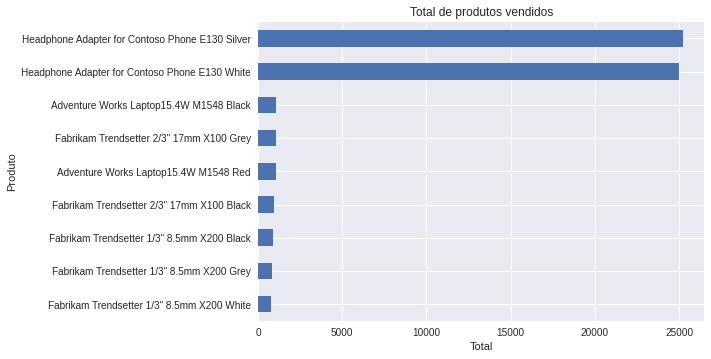

In [200]:
# Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title= "Total de produtos vendidos");
plt.xlabel("Total")
plt.ylabel("Produto")

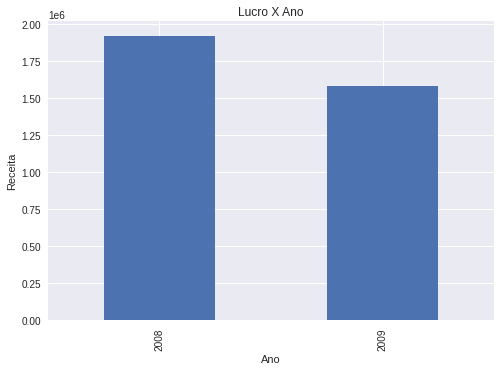

In [206]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [204]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [207]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]


In [208]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


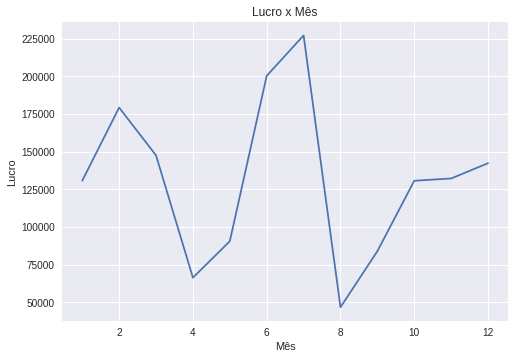

In [211]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

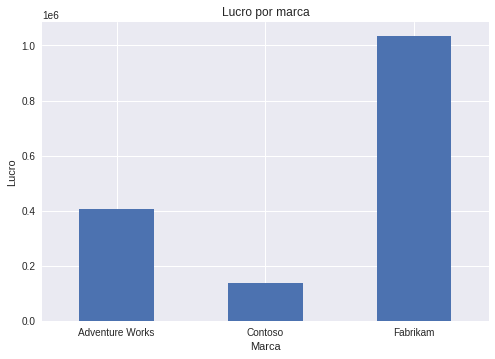

In [212]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro por marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

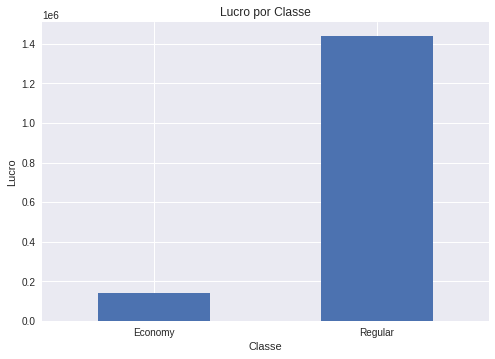

In [213]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro por Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [214]:
df["tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

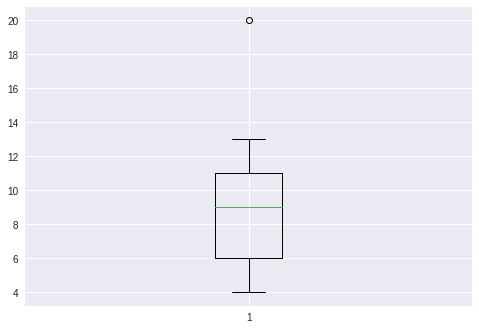

In [215]:
#Gráfico de boxplot
plt.boxplot(df["tempo_envio"]);

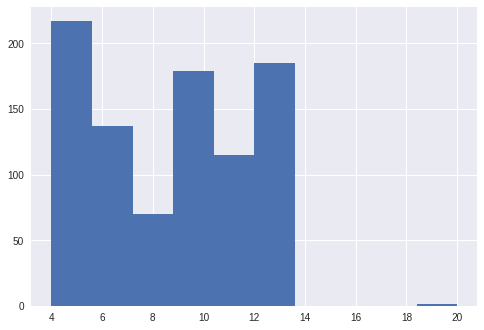

In [216]:
#Histograma
plt.hist(df["tempo_envio"]);

In [217]:
#Tempo de envio mínimo
df["tempo_envio"].min()

4

In [218]:
#Tempo de envio máximo
df["tempo_envio"].max()

20

In [219]:
#Identificando o Outlier
df[df["tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [220]:
df.to_csv("df.vendas_analisado.csv", index=False)